<a href="https://colab.research.google.com/github/Saad7912/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#API to fetch dataset
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:06<00:00, 29.9MB/s]
100% 163M/163M [00:06<00:00, 26.1MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


 data   face-mask-dataset.zip  'kaggle .json'   sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2241.jpg', 'with_mask_1406.jpg', 'with_mask_2212.jpg', 'with_mask_2148.jpg', 'with_mask_1974.jpg']
['with_mask_2325.jpg', 'with_mask_1096.jpg', 'with_mask_2439.jpg', 'with_mask_1880.jpg', 'with_mask_1694.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_413.jpg', 'without_mask_3426.jpg', 'without_mask_3256.jpg', 'without_mask_1997.jpg', 'without_mask_3069.jpg']
['without_mask_721.jpg', 'without_mask_3707.jpg', 'without_mask_955.jpg', 'without_mask_3304.jpg', 'without_mask_2213.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


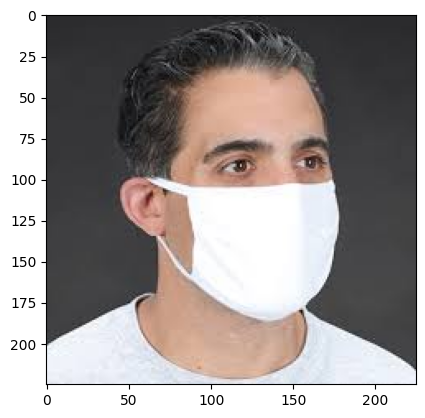

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2212.jpg')
imgplot = plt.imshow(img)
plt.show()

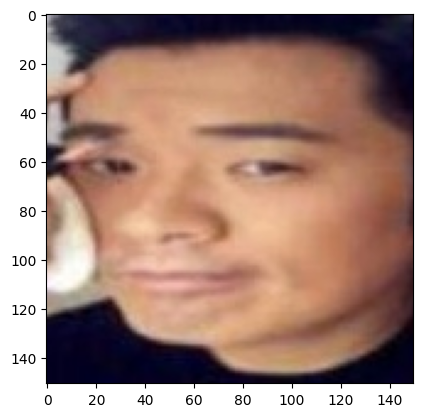

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3707.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'

In [ ]:
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[228, 220, 235],
        [228, 220, 235],
        [227, 219, 234],
        ...,
        [250, 243, 251],
        [254, 247, 254],
        [255, 250, 255]],

       [[228, 220, 235],
        [227, 219, 234],
        [226, 218, 233],
        ...,
        [247, 240, 248],
        [253, 247, 254],
        [255, 250, 255]],

       [[226, 216, 232],
        [226, 217, 232],
        [226, 216, 232],
        ...,
        [250, 242, 251],
        [254, 246, 255],
        [254, 248, 255]]], dtype=uint8)
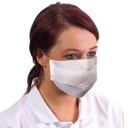

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, # tilt of picture
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
datagen.fit(X_train_scaled)

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [ ]:
 #training the neural network with data augmentation
history = model.fit(datagen.flow(X_train_scaled, Y_train, batch_size=32),
                    validation_data=(X_test_scaled, Y_test),
                    epochs=15,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/15
189/189 [==============================] - 178s 930ms/step - loss: 0.5805 - acc: 0.7084 - val_loss: 0.3388 - val_acc: 0.8723 - lr: 0.0010
Epoch 2/15
189/189 [==============================] - 166s 876ms/step - loss: 0.4350 - acc: 0.8199 - val_loss: 0.2853 - val_acc: 0.8782 - lr: 0.0010
Epoch 3/15
189/189 [==============================] - 172s 908ms/step - loss: 0.4004 - acc: 0.8295 - val_loss: 0.2689 - val_acc: 0.8822 - lr: 0.0010
Epoch 4/15
189/189 [==============================] - 172s 907ms/step - loss: 0.3838 - acc: 0.8396 - val_loss: 0.2691 - val_acc: 0.8822 - lr: 0.0010
Epoch 5/15
189/189 [==============================] - 169s 892ms/step - loss: 0.3590 - acc: 0.8537 - val_loss: 0.2502 - val_acc: 0.8855 - lr: 0.0010
Epoch 6/15
189/189 [==============================] - 169s 895ms/step - loss: 0.3509 - acc: 0.8519 - val_loss: 0.2300 - val_acc: 0.8948 - lr: 0.0010
Epoch 7/15
189/189 [==============================] - 181s 957ms/step - loss: 0.3378 - acc: 0.8539 - val_l

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 13s 278ms/step - loss: 0.1641 - acc: 0.9431
Test Accuracy = 0.9430840611457825


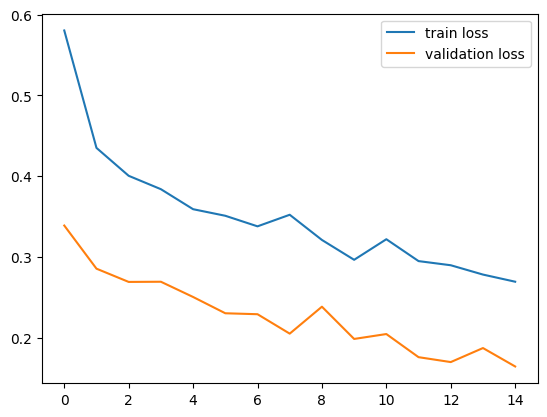

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

Path of the image to be predicted: /content/mask.jpg


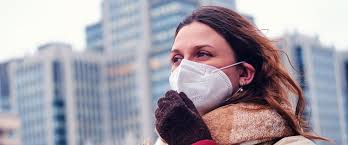

1/1 [==============================] - 0s 42ms/step
[[0.3952132 0.52769  ]]
1
The person in the image is  wearing a mask


In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The person in the image is not wearing a mask')
elif input_pred_label == 1:
  print('The person in the image is  wearing a mask')